### Testing the extended ionisation chamber

* 13 mm extra distance between cathode and aperture.

**Notes:**

Base pressure is 5.5e-6 mBar.

**Conclusion:**

TBD.

<img src="images/PXL_20201130_113607609.jpg" width="500">

### Communicate with the Keithley DMM Array Plate Monitor and Take Data

1. Connect to the Keithley over local area network ethernet
2. Take current reading (voltage across 100 Ohm resistor)
    * Flick switch to current on array plate interface box
3. Take voltage reading (charge accumulated on floating pin of array plate)
    * Flick switch to voltage on array plate interface box
4. Append readings in the form of a dictionary to a list
5. Repeat until all data is taken
6. Save data to json file
7. Disconnect Keithley to release the socket so other programs can use it


### Use the following cells to take data

In [1]:
import ArrayPlateLogger as apl
import importlib # Allows the module to be reloaded so that changes to the source code take effect. 
importlib.reload(apl)

<module 'ArrayPlateLogger' from 'C:\\Users\\matt_\\Documents\\GitHub\\ArrayPlateKeithleyLogger\\ArrayPlateLogger.py'>

In [9]:
apl.disconnectVisa() # If you lose communications with the Keithley, run this.

In [2]:
data = apl.arrayPlateMeasurement()

In [3]:
data.connect()

KEITHLEY INSTRUMENTS INC.,MODEL 2701,4368285,D05  /A02  


### Run the following cell just to get a quick reading

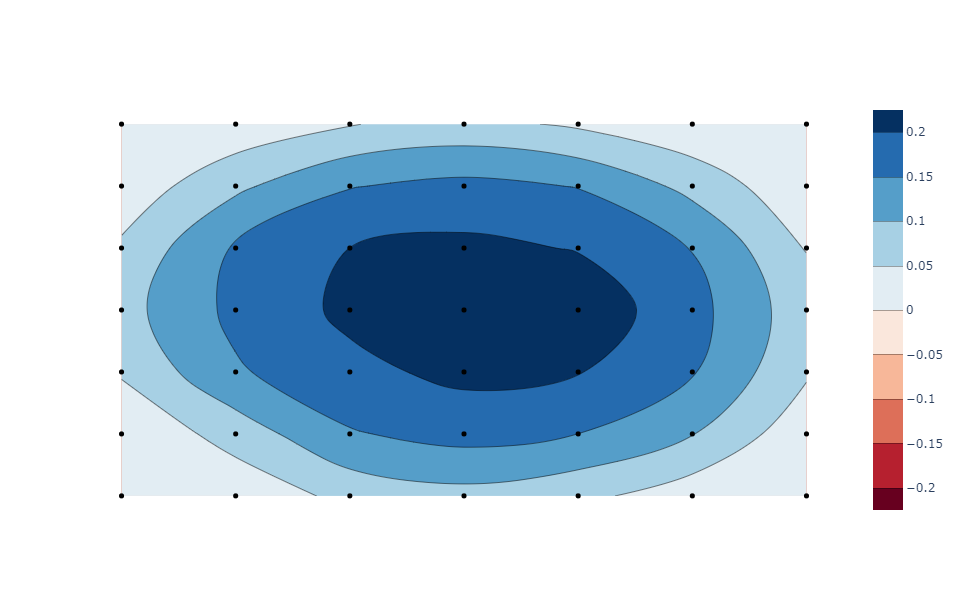

In [7]:
currents = data.readCurrents(centre5x5 = False)
apl.plotI(currents)

### Run following cell to add data to list of dictionaries

In [11]:
data.data[-1]['pressure'] = 1.8e-4 # correct pressure reading
# data.deleteLast()

Number of entries: 13


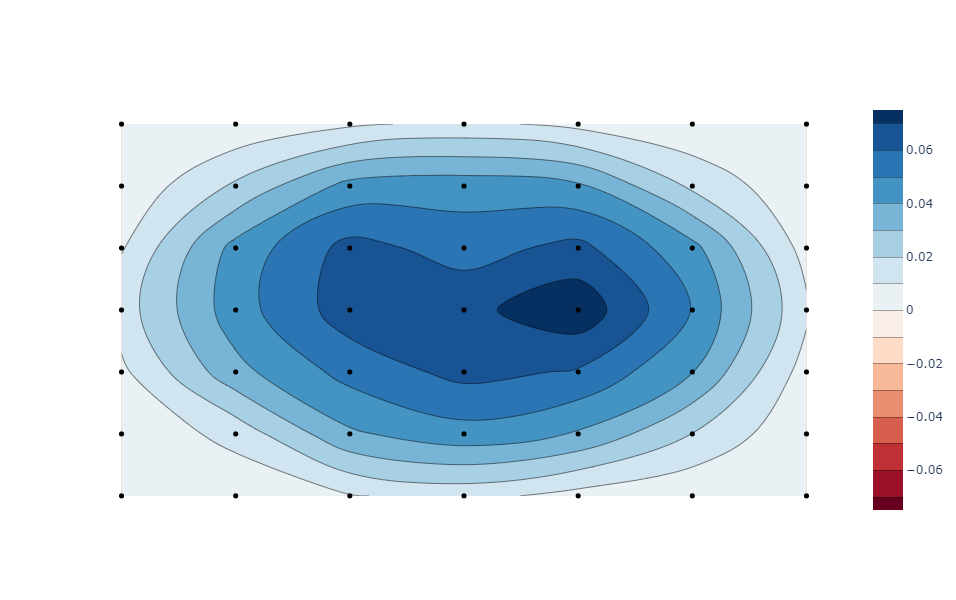

In [22]:
currents = data.readCurrents(centre5x5=False)
# apl.plotI(currents)
data.append(
    pressure = 2.0e-4,
    Vbias = 100,
    Ibias = 0.147,
    Varc = 70,
    Iarc = 2.0,
    Ibase = 5.43,
    currents = currents,
    note = ''
)
data.plotI()

In [23]:
data.save('data')

data_201209_155106.json


In [24]:
data.disconnect()

### Use the following cells to look at the data

* I didn't get much data because the filament was failing and gave up during the penultimate run.
* The current hitting the baseplate and the fluorescence visible in the chamber was highly dependent on the gas pressure.
* I am not convinced that the bias current is representative of typical running conditions because the filament was failing and will have had a hot spot.
* I varied the bias voltage and extraction voltage but because the extraction voltage was actually set positive, the bias voltage was highly coupled to it and floated up to always be 5 to 10 V more positive than the voltage on the extractor.
* Need at least + 100 V bias/extraction V or ion current is not centralised on the array plate.

In [25]:
import ArrayPlateLogger as apl
import importlib # Allows the module to be reloaded so that changes to the source code take effect. 
importlib.reload(apl)
savedData = apl.arrayPlateMeasurement()
savedData.load("data_201209_155106.json")
savedData.exportCSV('data_201209_155106')

13 entries loaded.


,time,Vbias,Ibias,Varc,Iarc,Ibase,pressure,IpinMax,note
0,201209_153427,100,0.165,70,2.12,6.46,0.0002,0.07886,


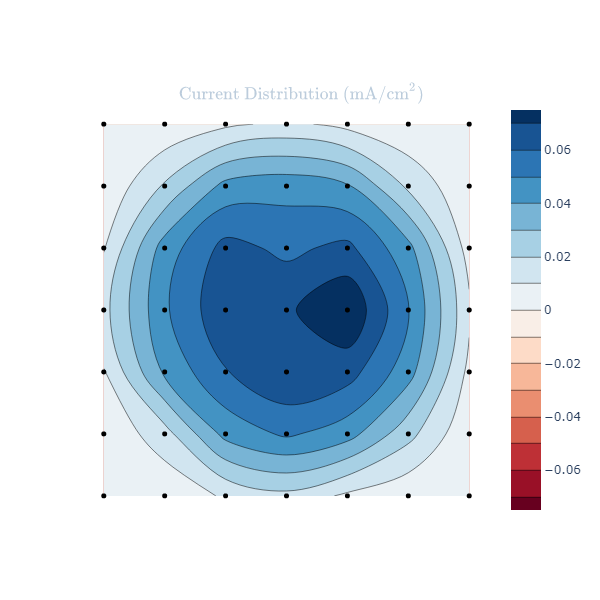

,time,Vbias,Ibias,Varc,Iarc,Ibase,pressure,IpinMax,note
1,201209_153515,100,0.184,80,2.27,6.83,0.0002,0.08812,


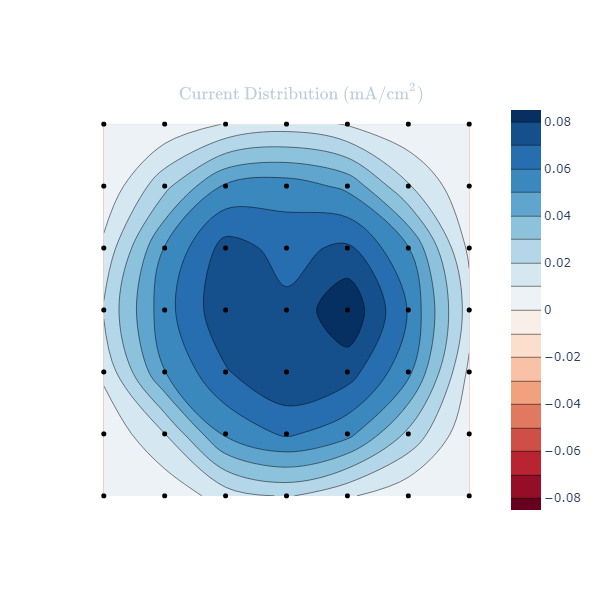

,time,Vbias,Ibias,Varc,Iarc,Ibase,pressure,IpinMax,note
2,201209_153613,100,0.204,90,2.4,7.02,0.00018,0.09609,


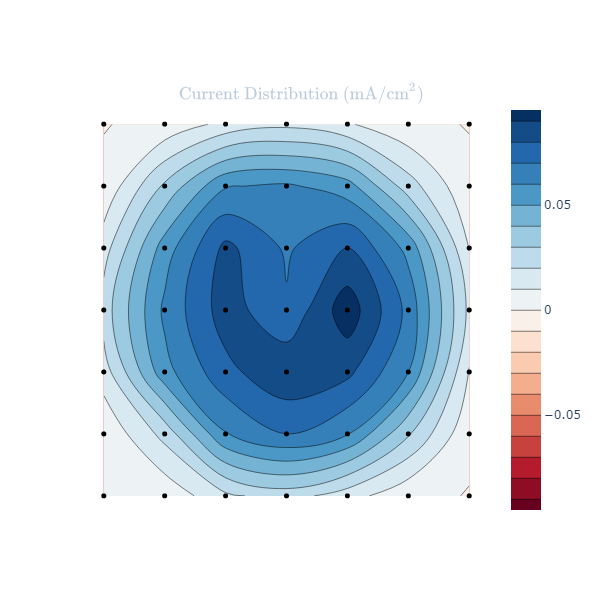

,time,Vbias,Ibias,Varc,Iarc,Ibase,pressure,IpinMax,note
3,201209_153713,100,0.216,90,2.51,7.61,0.0002,0.1016,


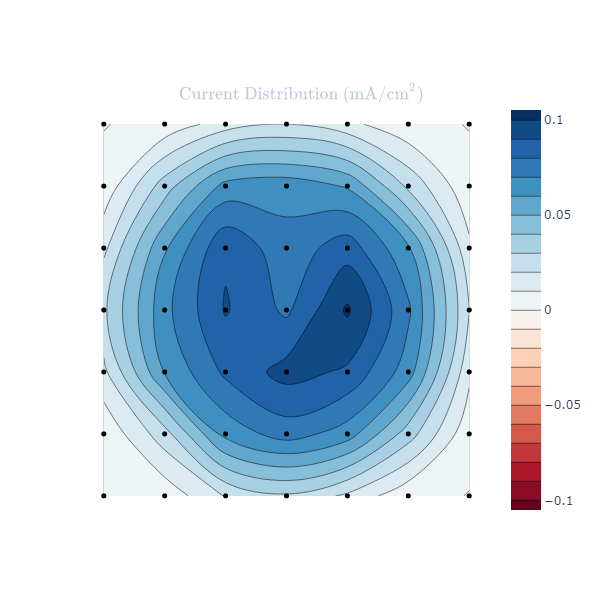

,time,Vbias,Ibias,Varc,Iarc,Ibase,pressure,IpinMax,note
4,201209_153757,100,0.243,100,2.7,8.15,0.0002,0.113,


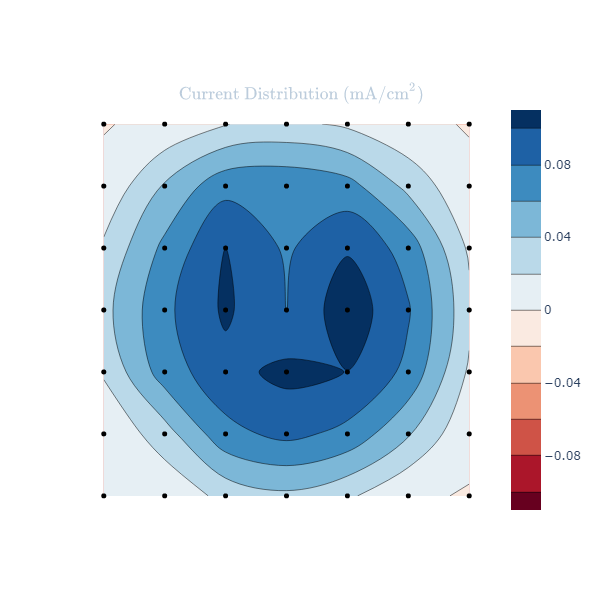

,time,Vbias,Ibias,Varc,Iarc,Ibase,pressure,IpinMax,note
5,201209_153859,100,0.277,110,2.9,9.06,0.0002,0.1279,


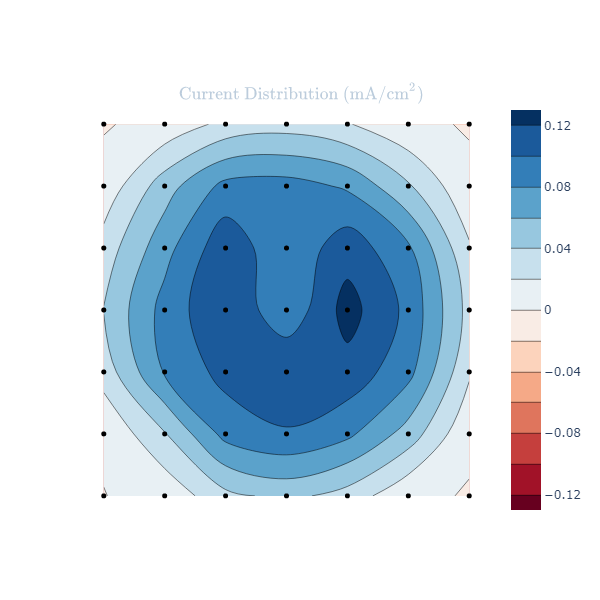

,time,Vbias,Ibias,Varc,Iarc,Ibase,pressure,IpinMax,note
6,201209_153958,100,0.35,120,3.1,13.26,0.00021,0.1529,


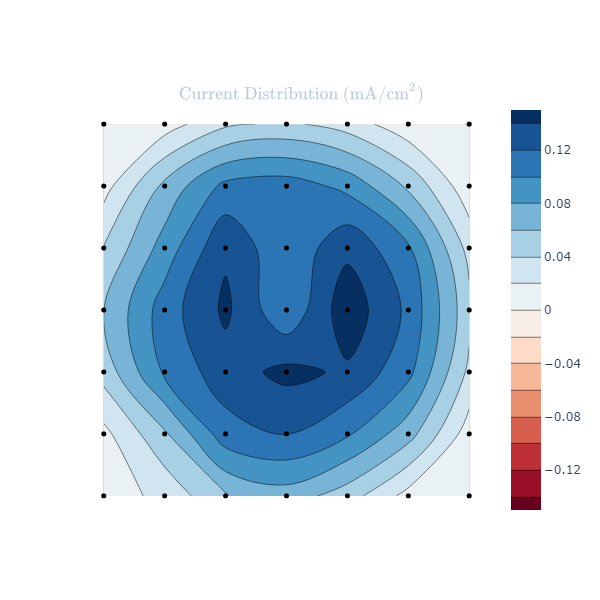

,time,Vbias,Ibias,Varc,Iarc,Ibase,pressure,IpinMax,note
7,201209_154118,100,0.387,130,3.28,14.52,0.0002,0.1677,


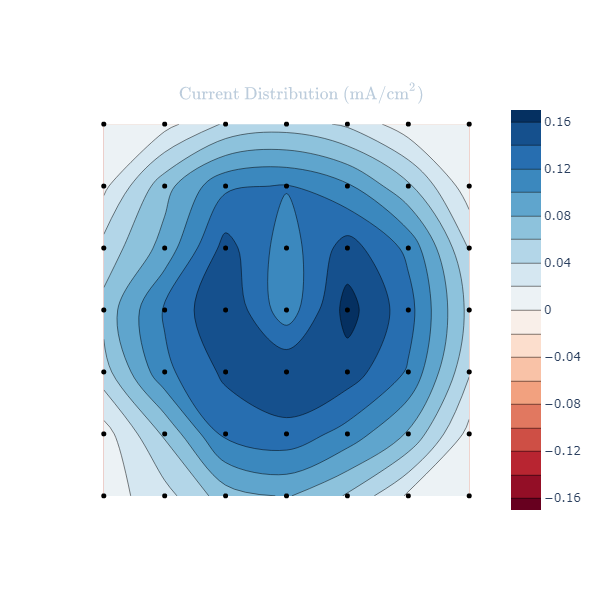

,time,Vbias,Ibias,Varc,Iarc,Ibase,pressure,IpinMax,note
8,201209_154154,100,0.44,140,3.5,17.62,0.0002,0.1928,


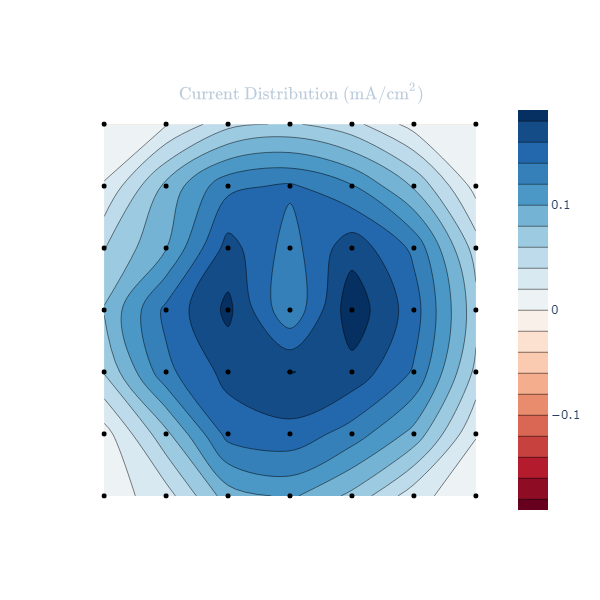

,time,Vbias,Ibias,Varc,Iarc,Ibase,pressure,IpinMax,note
9,201209_154247,100,0.505,150,3.76,20.6,0.0002,0.2215,


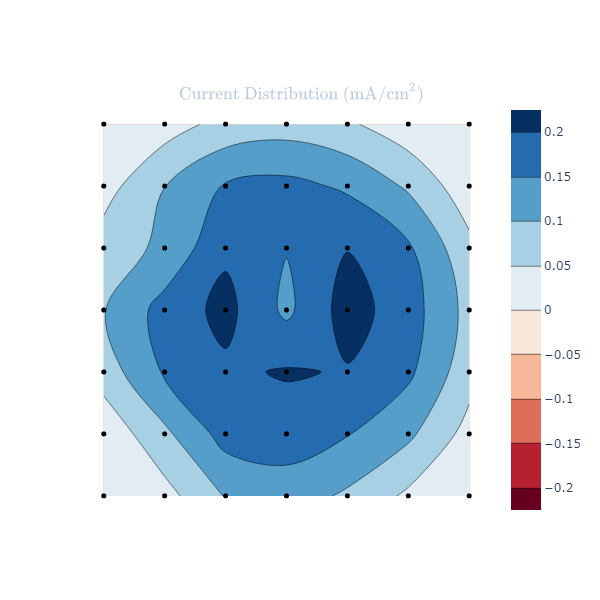

,time,Vbias,Ibias,Varc,Iarc,Ibase,pressure,IpinMax,note
10,201209_154557,100,0.26,149,2.1,7.46,0.0002,0.1155,


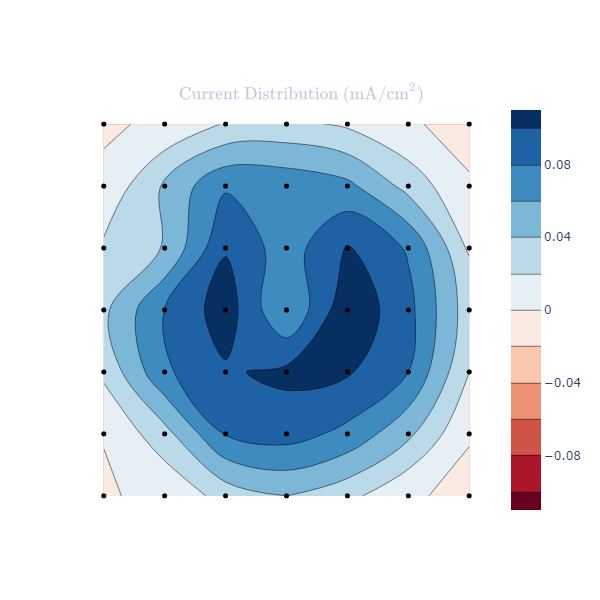

,time,Vbias,Ibias,Varc,Iarc,Ibase,pressure,IpinMax,note
11,201209_154755,100,0.173,99,1.9,4.2,0.0002,0.07425,


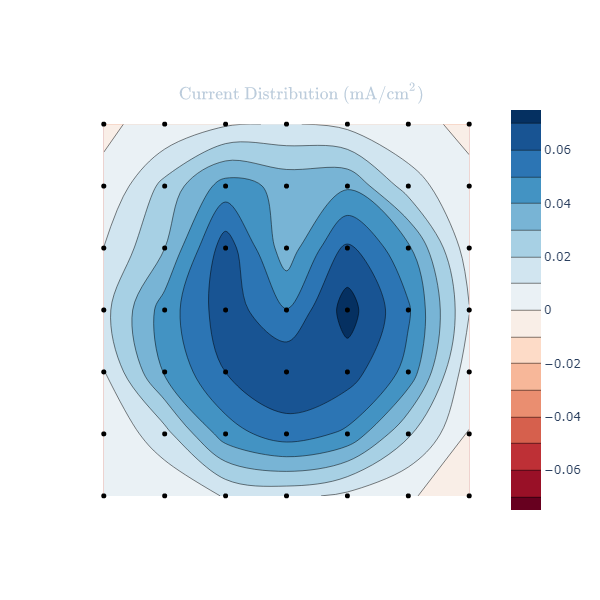

,time,Vbias,Ibias,Varc,Iarc,Ibase,pressure,IpinMax,note
12,201209_154929,100,0.147,70,2.0,5.43,0.0002,0.07684,


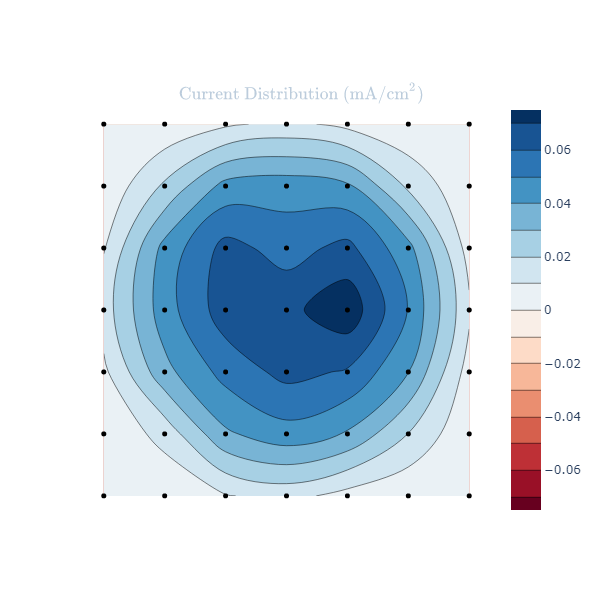

In [27]:
# conda install -c plotly plotly-orca
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio
from IPython.display import Image
df = pd.DataFrame(savedData.data)
# df = df[['time', 'Vbias', 'Ibias', 'Vext', 'Iext', 'Ve1', 'Ie1', 'Varc', 'Iarc', 'Ibase', 'pressure', 'note']]

IpinMax = []
for currentArray in df.currents:
    IpinMax.append(np.max(currentArray))
    
df = df[['time', 'Vbias', 'Ibias', 'Varc', 'Iarc', 'Ibase', 'pressure', 'note']]
df.insert(7, "IpinMax", IpinMax, True)

for i in range(savedData.len()):
    display(df[i:i+1])
    fig = savedData.plotI(i)
#     fig = plotI(data.data[i]['currents'])
    display(Image(pio.to_image(fig, format='png'))) # use this to have static graphs render on github.
#     fig.show()

##### Plot of $I_{base}$ and $I_{PinMax}$ vs Run

In [42]:
x = []
Ibase = []
IpinMax = []
for i, run in enumerate(savedData.data):
    x.append(i)
    Ibase.append(run['Ibase'])
    currents = np.array(run['currents'])
    IpinMax.append(np.max(currents)) 

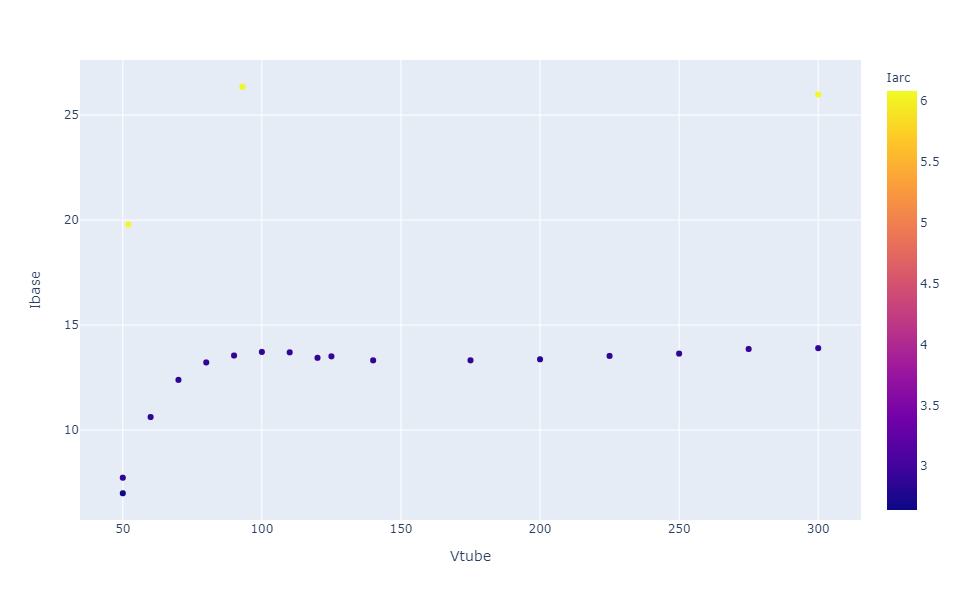

In [45]:
import plotly.express as px
import numpy as np
# df = px.data.iris()
fig = px.scatter(df, x='Vtube', y='Ibase', color = 'Iarc',#hover_data = ['Iarc', 'Ibias', 'Vpfs_tube'])
                 hover_data={'IpinMax':True,
                             'Iarc':True, 
                             'pressure':':.2e',
#                              'Vpfs_tube':True, 
#                              # data not in dataframe, default formatting
#                              'suppl_1': np.random.random(len(df)),
#                              # data not in dataframe, customized formatting
#                              'suppl_2': (':.3f', np.random.random(len(df)))
                            })
fig.
fig.update_layout(height=600)
fig.show()

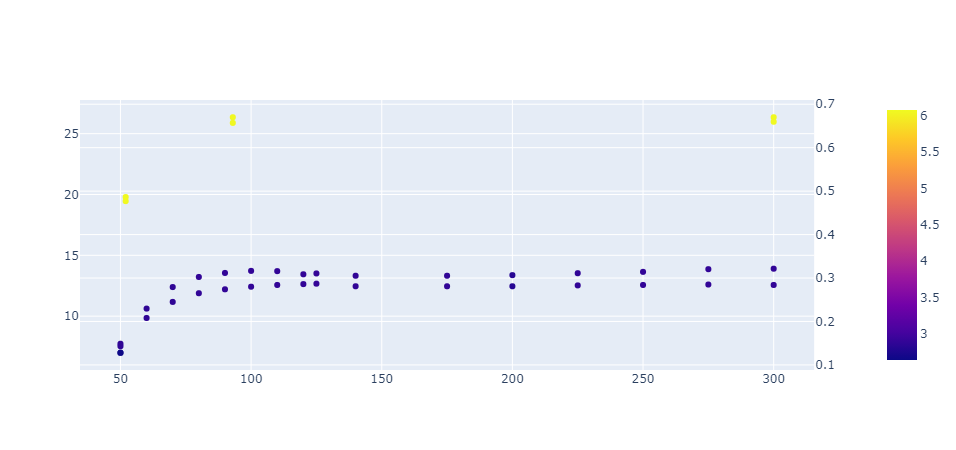

In [52]:
import plotly.express as px
from plotly.subplots import make_subplots
import pandas as pd
import numpy as np

subfig = make_subplots(specs=[[{"secondary_y": True}]])

# create two independent figures with px.line each containing data from multiple columns
fig = px.scatter(df, x='Vtube', y='Ibase', color = 'Iarc',#hover_data = ['Iarc', 'Ibias', 'Vpfs_tube'])
                 hover_data={'IpinMax':True,
                             'Iarc':True, 
                             'pressure':':.2e',
#                              'Vpfs_tube':True, 
#                              # data not in dataframe, default formatting
#                              'suppl_1': np.random.random(len(df)),
#                              # data not in dataframe, customized formatting
#                              'suppl_2': (':.3f', np.random.random(len(df)))
                            })
fig2 = px.scatter(df, x='Vtube', y='Itube', color = 'Iarc',#hover_data = ['Iarc', 'Ibias', 'Vpfs_tube'])
                 hover_data={'IpinMax':True,
                             'Iarc':True, 
                             'pressure':':.2e',
#                              'Vpfs_tube':True, 
#                              # data not in dataframe, default formatting
#                              'suppl_1': np.random.random(len(df)),
#                              # data not in dataframe, customized formatting
#                              'suppl_2': (':.3f', np.random.random(len(df)))
                            })

fig3 = px.scatter(df, x='Vtube', y='Ibias', color = 'Iarc',#hover_data = ['Iarc', 'Ibias', 'Vpfs_tube'])
                 hover_data={'IpinMax':True,
                             'Iarc':True, 
                             'pressure':':.2e',
#                              'Vpfs_tube':True, 
#                              # data not in dataframe, default formatting
#                              'suppl_1': np.random.random(len(df)),
#                              # data not in dataframe, customized formatting
#                              'suppl_2': (':.3f', np.random.random(len(df)))
                            })

# fig2.update_traces(yaxis="y2")
fig3.update_traces(yaxis="y2")
subfig.add_traces(fig.data + fig3.data)
# subfig.layout.xaxis.title="Time"
# subfig.layout.yaxis.title="Linear Y"
# subfig.layout.yaxis2.type="log"
# subfig.layout.yaxis2.title="Log Y"
# recoloring is necessary otherwise lines from fig und fig2 would share each color
# e.g. Linear-, Log- = blue; Linear+, Log+ = red... we don't want this
# subfig.for_each_trace(lambda t: t.update(line=dict(color=t.marker.color)))
subfig.show()